
<p><img alt="udeA logo" height="120px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="10px" vspace="0px" style="width:107px;height:152px;"></p>

# <center> <font color='0B5345'>Homework. Lecture 2.5:</font> </center>

# TASK : T1

<ol align="justify"> <font face="Verdana" size="2.5">
<li>To the case when the stream size is unknown, write the code to estimate the second moment using the Alon-Matias-Szegedy Algorithm. </li>
<li>Compute the second moment using both the exact method and the Alon-Matias-Szegedy Algorithm. Compare time and precision. </li>
</ol>
</font>

##  The exact moment

In [1]:
def exact_second_moment(stream, l_threshold,h_threshold):
    """
    :stream: a list of elements representing the input stream
    :l_threshold, h_threshold define range to frequency of items.
    :return: the exact surprise number and the  number of elements between thresholds
    """
    # Compute the frequency of each element in the stream
    frequency = {}
    for item in stream:
        frequency[item] = frequency.get(item, 0) + 1
    # Compute the sum of squares of frequencies
    surprise_number = sum(frequency[item] ** 2 for item in frequency)
    return  surprise_number, sum( 1 for x in frequency if frequency[x] >= l_threshold and  frequency[x] <= h_threshold), frequency

In [2]:
stream=["a","b","c","b","d","a","c","h","d","a","b","d","c","x","a","g","b","z","a","b","z","c","b","d","a","c","h","g","d","a","z","b","d","c","a","h","a","b","z","a","b","c","b","f","d","z","a","c","h","d","a","b","d","z","c","a","a","b","f","g","h","c","a","b","c","b","d","a","c","h","d","a","b","d","c","a","a","g","b","z","a","b","z","c","b","d","a","x","h","g","x","a","z","b","d","c","x","h","a","b","z","a","b","c","b","x","d","z","a","c","h","x","a","b","d","z","c","a","a","b","f","x","h","c"]

In [3]:
a,_,_=exact_second_moment(stream,1,2)
a

2304

### Alon-Matias-Szegedy (AMS) Algorithm for Second Moment.
###  Write the version of the Book "Mining of Massive Datasets" with reservoir approach with unknown size of stream.

In [4]:
import numpy as np
import random

def ams(stream, sample_size):
    sample = {}
    idx = len(stream)
    sample_position = 0
    ## ADD YOR CODE HERE
    randomTimes = [int(np.floor(np.random.uniform(0, idx))) for _ in range(0, sample_size)]
    for i in range(0, len(randomTimes)):
      sample[stream[randomTimes[i]]] = (stream[randomTimes[i]], 0)
    for i in range(0, idx):
      if stream[i] in sample:
        sample[stream[i]] = (sample[stream[i]][0], sample[stream[i]][1] + 1)
    ## END YOUR CODE HERE
    s_moment  =  sum( idx * (2 * sample[item][1] -1) for item in sample) / sample_size                # average(n ( 2 * freq - 1 ))/ sample_size
    return sample, s_moment ,idx                                                       # gathered sample, second moment, stream_size

In [5]:
stream = ["a","b","c","b","d","a","c","d","a","b","d","c","a","a","g","b","a","b","c","b","d","a","c","g","d","a","b","d","c","a","a","b","a","b","c","b","f","d","a","c","d","a","b","d","c","a","a","b","f","g","h"]

In [6]:
a,_,_=ams(stream,4)
print("item,[sample_position, frequency, stream_position]",a)

item,[sample_position, frequency, stream_position] {'b': ('b', 12), 'd': ('d', 9)}


# Testing your code

## Case 1:  Three large group of frequencies

In [7]:
# Building the input stream
#case 1:
import random
stream_size1 = 200000
max_value1 =  200
stream1 = [random.randint(1, max_value1) for _ in range(stream_size1)]

stream_size2 = 300000
max_value2 = 800
stream2 = [random.randint(max_value1 + 1, max_value2) for _ in range(stream_size2)]

stream_size3 = 500000
max_value3 = 1000
stream3 = [random.randint(max_value2 + 1, max_value3) for _ in range(stream_size3)]

In [8]:
import numpy as np
stream_case1 = np.concatenate((stream1, stream2, stream3))

In [9]:
# histogram
print(min(stream1), max(stream1),int(len(stream1)/(max(stream1)-min(stream1))) ,"---", min(stream2), max(stream2),int(len(stream2)/(max(stream2)-min(stream2))),"---", min(stream3), max(stream3),int(len(stream3)/(max(stream3)-min(stream3))) )

1 200 1005 --- 201 800 500 --- 801 1000 2512


#### Exact moment

In [10]:
surprise_number, count, frequency_c1 = exact_second_moment(stream_case1,600,850)
print("surprise number", " and count",surprise_number,",", count)

surprise number  and count 1600977690 , 0


In [11]:
# Sort by value
freq_sorted = dict(sorted(frequency_c1.items(), key=lambda item: item[1]))

<ipython-input-12-9c61478f2386>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


<BarContainer object of 1000 artists>

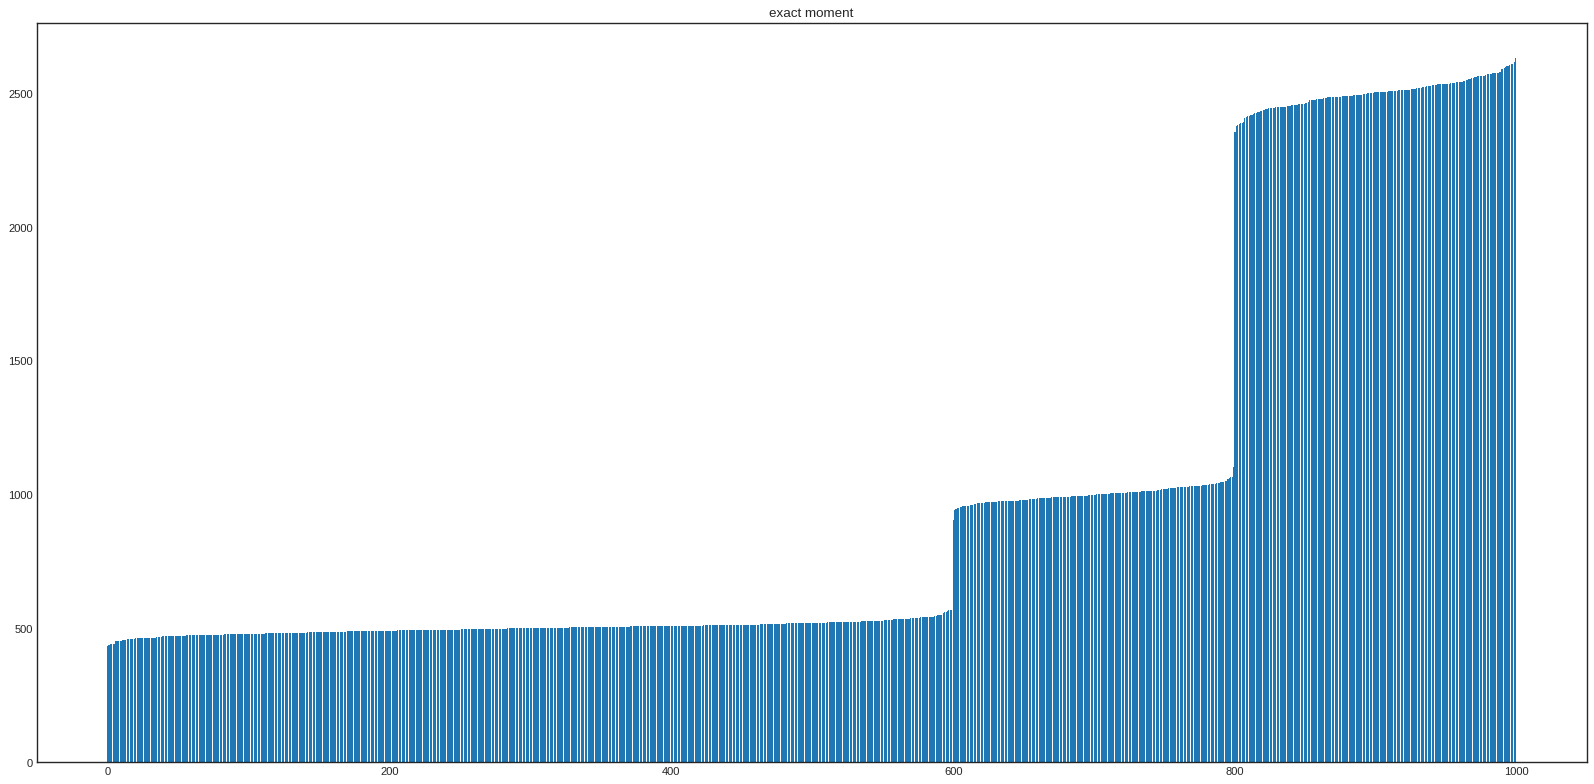

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('seaborn-white')
figure(figsize=(25, 12), dpi=80)
names = list(freq_sorted.keys())
values = list(freq_sorted.values())
plt.title("exact moment")
plt.bar(range(len(freq_sorted)), values)

#### Estimated moment

In [13]:
sample, frequency, p_random = ams(stream_case1, 900)
# print("surprise number", " and count",e_sample,",", v_sample)
print("surprise number", frequency)

surprise number 1540931111.1111112


In [14]:
# Sort by value
freq_sorted1 = dict(sorted(sample.items(), key=lambda item: item[1][1]))

In [15]:
freq_sorted11 = []
for old_item in freq_sorted1.values():
   freq_sorted11.append(old_item[1]) # find item in position j  to be deleted.

<ipython-input-16-d37f3f94c56f>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


<BarContainer object of 524 artists>

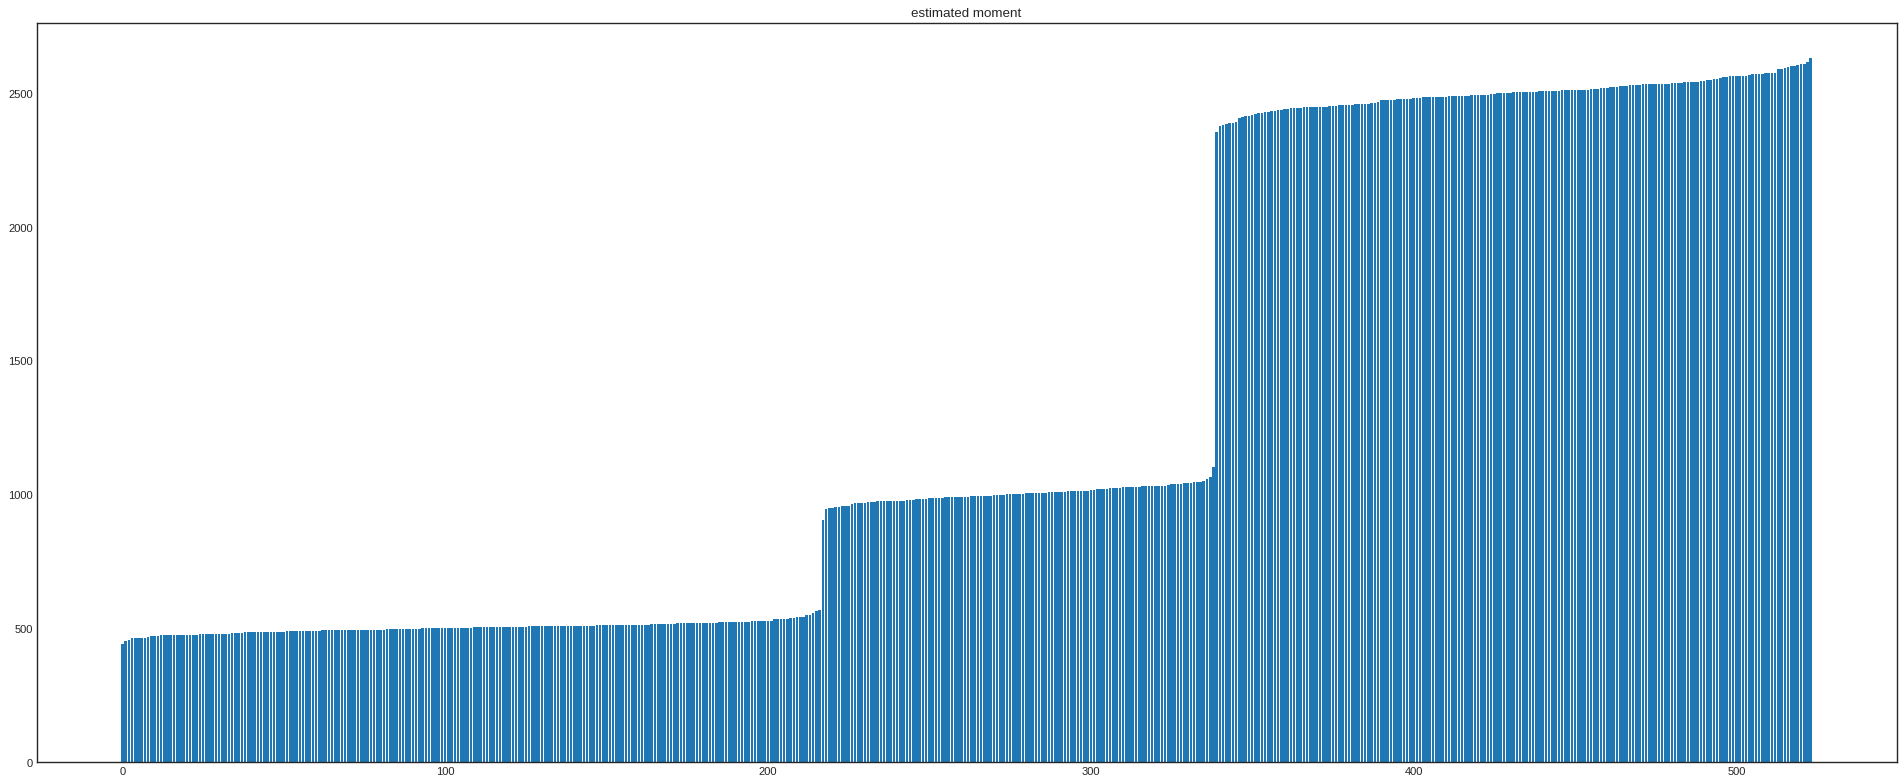

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('seaborn-white')
figure(figsize=(30, 12), dpi=80)
names = list(freq_sorted1.keys())
values = list(freq_sorted11)
plt.title("estimated moment")
plt.bar(range(len(freq_sorted11)), values)

#Case 2: least skewed distribution.

In [17]:
# preparing input stream
import random
stream_size4 = 2000000
max_value4 =   1000
stream4 = [random.randint(1, max_value4) for _ in range(stream_size4)]

stream_size5 = 3000000
max_value5 =   4000
stream5 = [random.randint(max_value4 + 1, max_value5) for _ in range(stream_size5)]

stream_size6 = 5000000
max_value6 = 9000
stream6 = [random.randint(max_value5 + 1, max_value6) for _ in range(stream_size6)]

In [18]:
import numpy as np
stream_case2 = np.concatenate((stream4, stream5, stream6))

In [19]:
# histogram
print("min value, -----max value, ------stream length, ----average number per value")
print(min(stream4),max(stream4),len(stream4),int(len(stream4)/max_value4)," ---",min(stream5), max(stream5), len(stream5),int(len(stream5)/ max_value5), "---",min(stream6), max(stream6), len(stream6),int(len(stream6)/ max_value6) )

min value, -----max value, ------stream length, ----average number per value
1 1000 2000000 2000  --- 1001 4000 3000000 750 --- 4001 9000 5000000 555


### Exact second moment

In [20]:
surprise_number2, count2, frequency_c12 = exact_second_moment(stream_case2,600,850)
print("surprise number", " and count",surprise_number2,",", count2)

surprise number  and count 12009808512 , 0


In [21]:
# Sort by value
freq_sorted22 = dict(sorted(frequency_c12.items(), key=lambda item: item[1]))

<ipython-input-22-d1aea03b777f>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


<BarContainer object of 9000 artists>

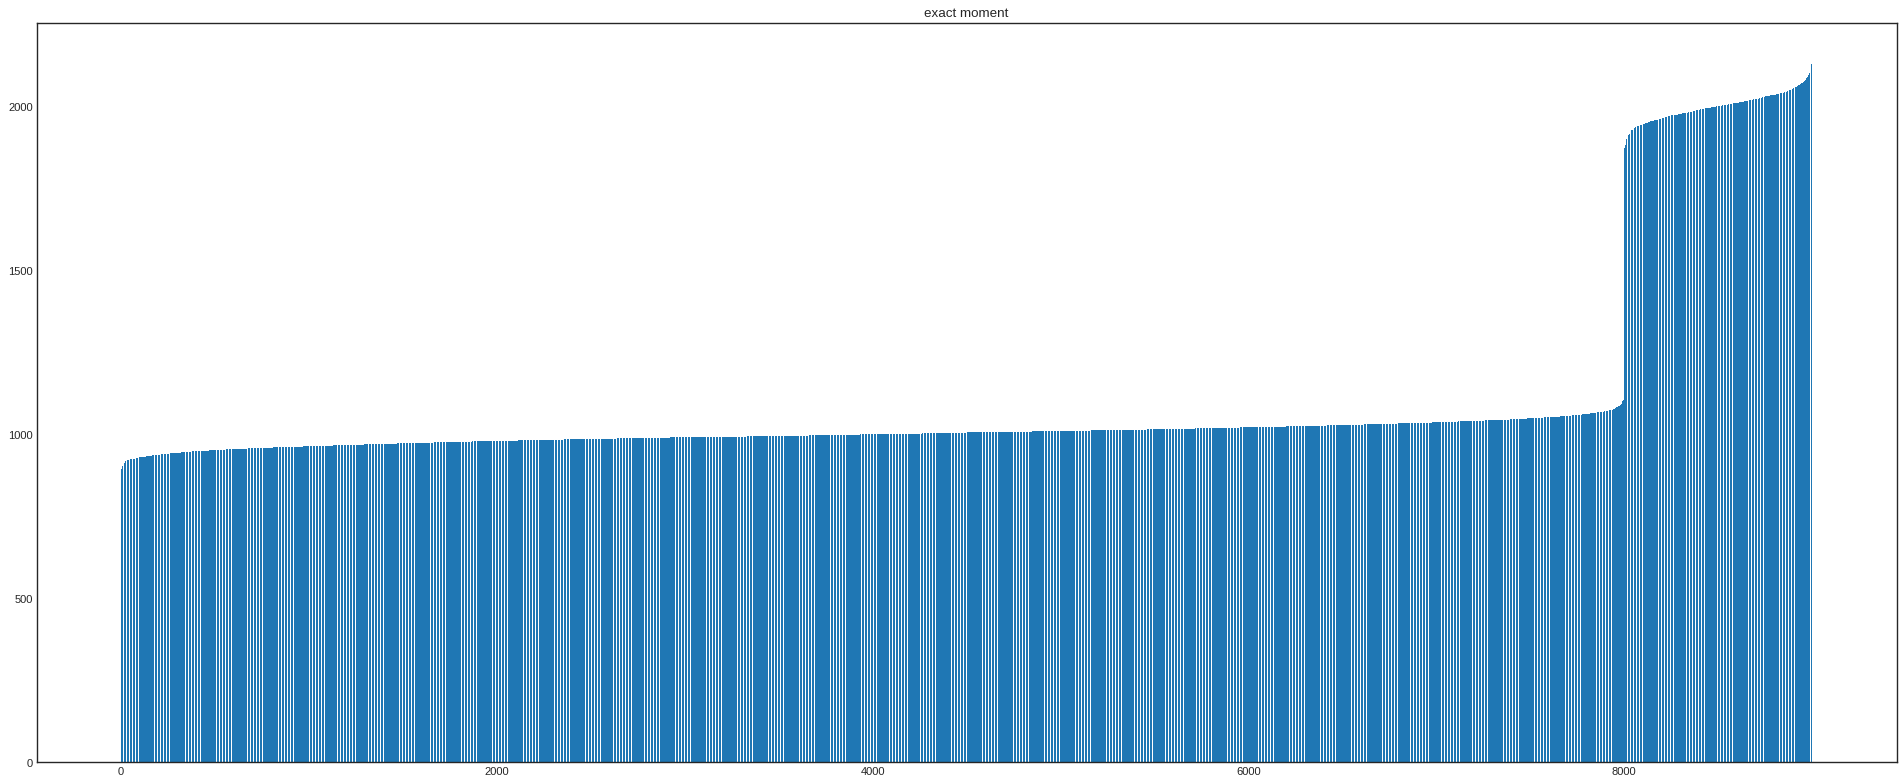

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('seaborn-white')
figure(figsize=(30, 12), dpi=80)
names = list(freq_sorted22.keys())
values = list(freq_sorted22.values())
plt.title("exact moment")
plt.bar(range(len(freq_sorted22)), values)

### Estimating the second moment + reservoir

In [23]:
sample221, frequency221, idx221 = ams(stream_case2, 1809)
print("surprise number", frequency221)

surprise number 21099568822.553898


In [24]:
# Sort by value
freq_sorted31 = dict(sorted(sample221.items(), key=lambda item: item[1][1]))

In [25]:
freq_sorted41 = []
for old_item in freq_sorted31.values():
   freq_sorted41.append(old_item[1])

<ipython-input-26-7306ad418bd1>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


<BarContainer object of 1626 artists>

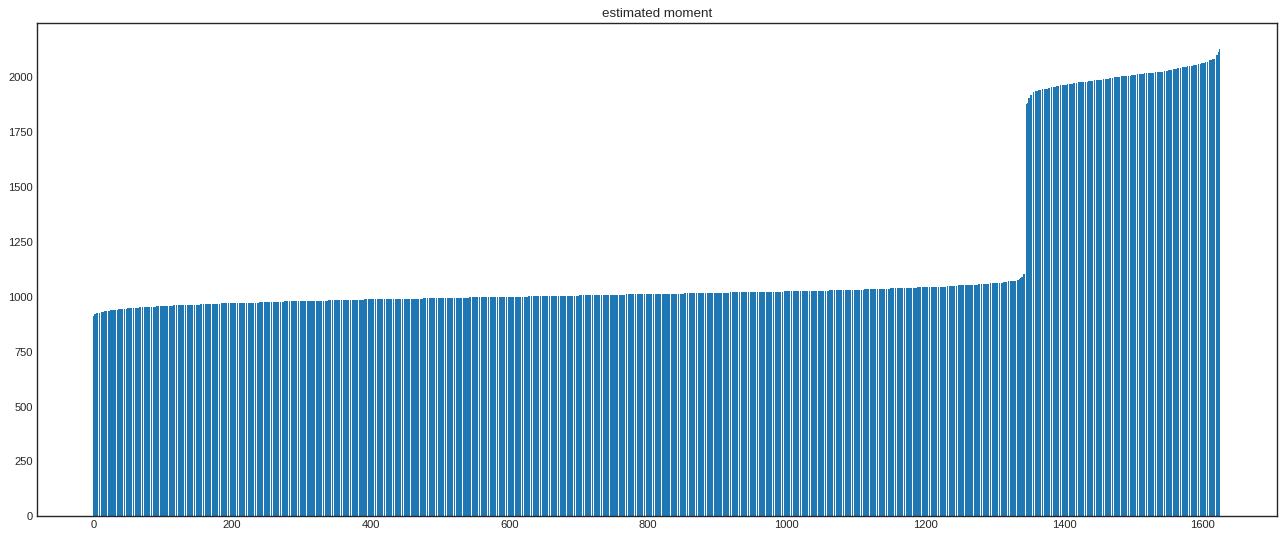

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('seaborn-white')
figure(figsize=(20, 8), dpi=80)
names = list(freq_sorted31.keys())
values = list(freq_sorted41)
plt.title("estimated moment")
plt.bar(range(len(freq_sorted31)), values)

# Case 3: Uniform distribution.

In [27]:
#case 3:
import random
import numpy as np
stream_size6 = 12000
max_value6 =  1200
stream_case6 = [np.random.uniform(1, max_value6) for _ in range(stream_size6)]

### Exact moment

In [28]:
surprise_number61, count61, frequency_c61 = exact_second_moment(stream_case6,600,850)
print("surprise number", " and count",surprise_number61,",", count61)

surprise number  and count 12000 , 0


In [29]:
# Sort by value
freq_sorted61 = dict(sorted(frequency_c61.items(), key=lambda item: item[1]))

<ipython-input-30-c763888c19db>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


<BarContainer object of 12000 artists>

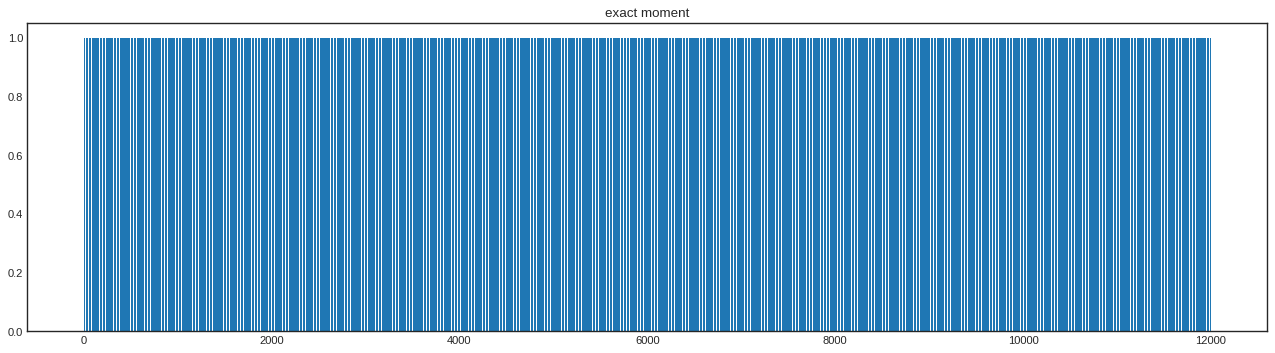

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('seaborn-white')
figure(figsize=(20, 5), dpi=80)
names = list(freq_sorted61.keys())
values = list(freq_sorted61.values())
plt.title("exact moment")
plt.bar(range(len(freq_sorted61)), values)

### Estimated second moment.

In [31]:
sample71, frequency71, idx71 = ams(stream_case6, 900)
print("surprise number", frequency71)

surprise number 11653.333333333334


In [32]:
freq_sorted71 = dict(sorted(sample71.items(), key=lambda item: item[1][1]))

In [33]:
freq_sorted81 = []
for old_item in freq_sorted71.values():
   freq_sorted81.append(old_item[1])

<ipython-input-34-0fb7107f65a7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


<BarContainer object of 874 artists>

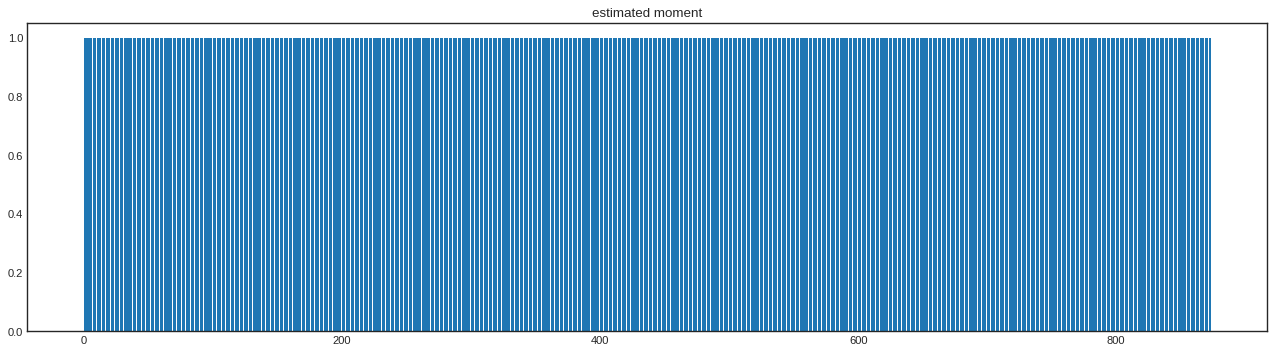

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('seaborn-white')
figure(figsize=(20, 5), dpi=80)
names = list(freq_sorted71.keys())
values = list(freq_sorted81)
plt.title("estimated moment")
plt.bar(range(len(freq_sorted71)), values)

# TASK : T2

<ol align="justify"> <font face="Verdana" size="2.5">
<li> If a stream has $n$ elements, of which $m$ are distinct, what are the minimum and maximum possible surprise number, as a function of $m$ and
$n$?  </li>
<li>Let $P$ be a dataframe with schema <b><em>(url-source, url-target)</em></b>. Suppose $10^{6}$ Web pages in the universe and each Web page has 10 output links. Thus, the relation $P$ has $10^{7}$ tuples. You need build a join operation $P \Join P$ to find paths $url_i \to  url_j \to url_k$. <br><br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$P$&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$P$&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $P \Join P$
<font size="1.5">
\begin{align*}
\begin{array}{| r |  r | }
\hline url-source & url-target   \\
\hline url_1  & url_3  \\
\hline url_3  & url_2  \\
\hline url_4  & url_1  \\
\hline url_2  & url_3  \\
\hline url_3  & url_1  \\
\hline url_4  & url_2  \\
\hline url_2  & url_1  \\
\hline url_1  & url_2  \\
\hline    \end{array}
 &
 &
 \Join
   &
   &
\begin{array}{| r |  r | }
\hline url-source & url-target   \\
\hline url_1  & url_3  \\
\hline url_3  & url_2  \\
\hline url_4  & url_1  \\
\hline url_2  & url_3  \\
\hline url_3  & url_1  \\
\hline url_4  & url_2  \\
\hline url_2  & url_1  \\
\hline url_1  & url_2  \\
\hline    \end{array}
 &
 &
 =
   &
   &
\begin{array}
{| r |  r | r |}
\hline  url-source & url-target  & ulr-dest \\
\hline url_1  & url_3 &  url_2    \\
\hline url_1  & url_3 &  url_1   \\
\hline url_3  & url_2 &  url_3   \\
\hline url_3  & url_2 &  url_1   \\
\hline url_4  & url_1 &  url_3  \\
\hline url_4  & url_1 &  url_2  \\
\hline url_2  & url_3 &  url_2  \\
\hline url_2  & url_3 &  url_1  \\
\hline url_3  & url_1 &  url_3  \\
\hline url_3  & url_1 &  url_3  \\
\hline url_4  & url_2 &  url_3  \\
\hline url_4  & url_2 &  url_1  \\
\hline url_2  & url_1 &  url_3  \\
\hline url_2  & url_1 &  url_2  \\
\hline url_1  & url_2 &  url_3  \\
\hline url_1  & url_2 &  url_1  \\
\hline  \end{array}
\end{align*}
<br> </font>
How to estimate the size of the join output using the second frequency?
We need to estimate  the  number of tuples of the resultant relation but we can only access the rows in streaming fashion; in other words, with one pass over the dataframe and  compute a good estimate of the self join size.     <br>
Note that estimation of join size is a keep step of the query optimization process in the Relational Database Management Systems
</li>
<br>

<li> You have the following file. It stores info about students in the university. <br>
<img src="https://github.com/freddyduitama/images/blob/master/relation.png?raw=true"   align="left" height="420" width="250">
<br>
You need to define a partition by semester over the following dataframe. ¿How to use the second moment to obtain information about the data distribution? You need defines fragment having  almost a similar size.<br>
<b>Remark:</b> You need to define the partition size. </li>

</ol>